In [1]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("Nile.csv", parse_dates = ['Date'], index_col = ['Date'])
# data = pd.read_csv("Nile.csv")
data.head(10)

,Nile
Date,
1871-01-01,1120
1872-01-01,1160
1873-01-01,963
1874-01-01,1210
1875-01-01,1160
1876-01-01,1160
1877-01-01,813
1878-01-01,1230
1879-01-01,1370


In [3]:
data= data.rename(columns={'Nile':'CMS'})
data

,CMS
Date,
1871-01-01,1120
1872-01-01,1160
1873-01-01,963
1874-01-01,1210
1875-01-01,1160
...,...
1966-01-01,746
1967-01-01,919
1968-01-01,718


In [4]:
data.head(10)

,CMS
Date,
1871-01-01,1120
1872-01-01,1160
1873-01-01,963
1874-01-01,1210
1875-01-01,1160
1876-01-01,1160
1877-01-01,813
1878-01-01,1230
1879-01-01,1370


In [5]:
data.describe() # the description of the data

,CMS
count,100.000000
mean,919.350000
std,169.227501
min,456.000000
25%,798.500000
50%,893.500000
75%,1032.500000
max,1370.000000


<AxesSubplot:xlabel='Date', ylabel='Cubicmeter per Second'>

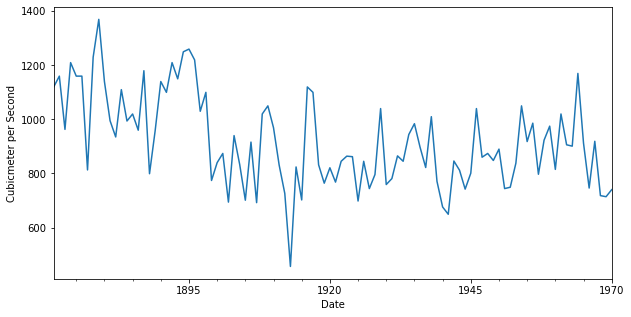

In [6]:
plt.xlabel('Date')
plt.ylabel('Cubicmeter per Second')
data["CMS"].plot(figsize=(10,5))

#### I realized that there is a trend in our dataset, but no seasonality

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1871-01-01 to 1970-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CMS     100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [8]:
# We want to have the rolling mean
rollmean = data.rolling(window=5).mean()
rollstd = data.rolling(window=5).std()
rollmean

,CMS
Date,
1871-01-01,NaN
1872-01-01,NaN
1873-01-01,NaN
1874-01-01,NaN
1875-01-01,1122.6
...,...
1966-01-01,927.0
1967-01-01,929.6
1968-01-01,893.0


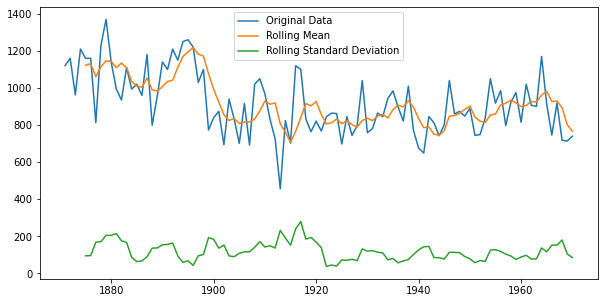

In [9]:
plt.gcf().set_size_inches(10, 5) # setting the size of the graph
original = plt.plot(data, label = "Original Data") 
mean = plt.plot(rollmean, label= "Rolling Mean")
standard_deviation = plt.plot(rollstd, label= "Rolling Standard Deviation")
plt.legend(loc='best')
plt.show()

In [10]:
import statsmodels.api as sm

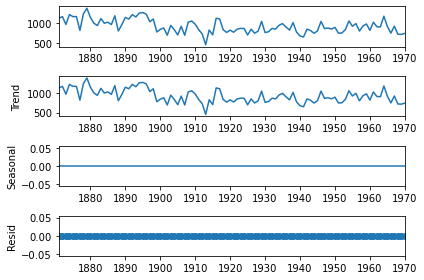

In [11]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

### In the graph above we realized that there is no trend or seasonality.

In [12]:
### Testing for stationarity

In [13]:
def test_stationarity(gdpseries):
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(gdpseries)
    dfoutput = pd.Series(dftest[0:4], index=['The test statistics', "The P-Value", "Number of Lags used", "Number of Observations"])
    print(dfoutput)


In [14]:
test_stationarity(data)

The test statistics       -4.048705
The P-Value                0.001176
Number of Lags used        1.000000
Number of Observations    98.000000
dtype: float64


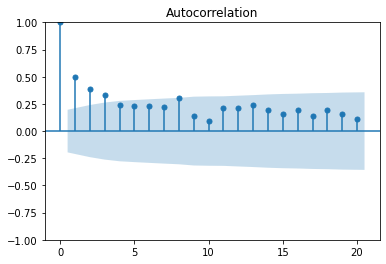

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lag_acf = plot_acf(data)
lag_acf.savefig('Autocorrelation.jpg')

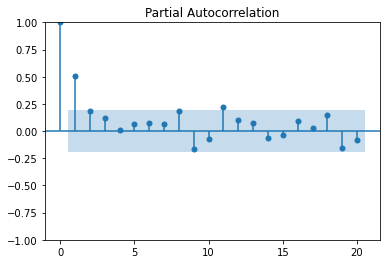

In [16]:
lag_pacf = plot_pacf(data)
lag_pacf.savefig('Partial_Autocorrelation.jpg')

#### Train Test Split

In [17]:
len(data)

100

In [18]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [19]:
# train = data[:80]
# test = data[80:]

### Method 1: Using pmd arima

In [20]:
import pmdarima
from pmdarima import auto_arima
auto_arima(train, m=12, start_P=0, seasonal=True, d=1, trace= True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1040.313, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1030.999, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1021.194, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1038.336, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1019.445, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1021.209, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1023.054, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1017.475, Time=0.09 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1019.442, Time=0.17 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1019.439, Time=0.19 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1021.386, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [23]:
# Using the recommended model to see its output
model_arima = ARIMA(train, order=(1,1,1))

model_arima_fit = model_arima.fit()
pred = model_arima_fit.predict(start= len(train), end=len(data)-1)
error = np.sqrt(mean_squared_error(test,pred))
print(error)

125.06196109597067


### Method 2: Using forloop

In [24]:
import itertools

In [25]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [26]:
# Creating a pdq combiation
pdq_combination = list(itertools.product(p,d,q))
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [27]:
# we have 128 combination
len(pdq_combination)

128

In [28]:
rmse = []
order1 = []


In [29]:
# Using the combinations created above to train the model and see which one has the lowest RMSE
for val in pdq_combination:
    try:
        model = ARIMA(train,order=val).fit()
        pred = model.predict(start= len(train), end=len(data)-1)
        error = np.sqrt(mean_squared_error(test,pred)) 
        order1.append(val)
        rmse.append(error)
    except:
        continue

In [30]:
results = pd.DataFrame(index = order1, data= rmse, columns=['RMSE'])
results

,RMSE
"(0, 0, 0)",133.313212
"(0, 0, 1)",133.102648
"(0, 0, 2)",132.207059
"(0, 0, 3)",131.925323
"(0, 0, 4)",128.833656
...,...
"(7, 1, 3)",117.596471
"(7, 1, 4)",126.447151
"(7, 1, 5)",118.056340
"(7, 1, 6)",125.085532


### Sorting the values in descending order to check for the lowest RMSE

In [31]:
results.sort_values(by=['RMSE']) # ORDER (6,0,5) is havng the best pdq combination

,RMSE
"(6, 0, 5)",115.531119
"(7, 1, 3)",117.596471
"(6, 1, 5)",117.891879
"(5, 1, 5)",118.034674
"(7, 1, 5)",118.056340
...,...
"(3, 1, 5)",134.182612
"(4, 0, 3)",134.352258
"(3, 1, 4)",134.415191
"(2, 1, 5)",134.926507


In [32]:
results.to_csv('ARIMA-RESULTS.csv') ## saving the RMSE to a file

### Building the ARIMA model 

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# train, test = train_test_split(data, test_size=0.2, shuffle=False)

model_arima = ARIMA(train, order=(6,0,5))

model_arima_fit = model_arima.fit()

prediction = model_arima_fit.predict(start='1951-01-01', end = '1970-01-01')

prediction

1951-01-01    876.675312
1952-01-01    803.660388
1953-01-01    825.185514
1954-01-01    940.693894
1955-01-01    874.856155
1956-01-01    875.945581
1957-01-01    820.902897
1958-01-01    890.089316
1959-01-01    913.728362
1960-01-01    870.254825
1961-01-01    874.808920
1962-01-01    850.916774
1963-01-01    914.378175
1964-01-01    889.807570
1965-01-01    880.285800
1966-01-01    876.767429
1967-01-01    879.798777
1968-01-01    913.615983
1969-01-01    881.841881
1970-01-01    891.428465
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

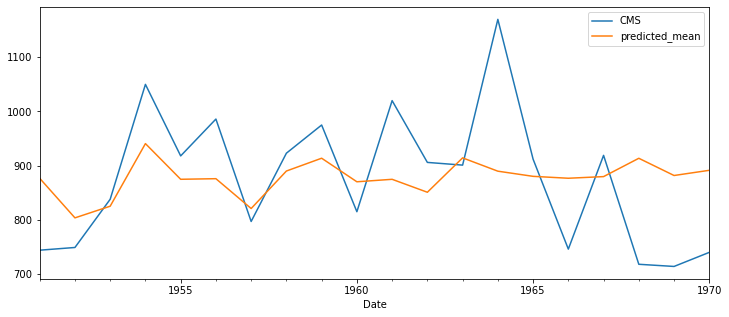

In [34]:
# Graphical representation od the prediction against the actual values
test.plot(legend=True, figsize=(12,5))
prediction.plot(legend=True)

### Future forecasting

In [35]:
Feature_prediction = model_arima_fit.predict(start='1971-01-01', end='1980-01-01', type='level').rename('ARIMA PREDICTION')
print(Feature_prediction)

1971-01-01    882.105565
1972-01-01    899.224128
1973-01-01    904.768774
1974-01-01    886.628628
1975-01-01    898.188646
1976-01-01    890.222200
1977-01-01    908.132114
1978-01-01    898.610479
1979-01-01    896.103536
1980-01-01    901.292082
Freq: AS-JAN, Name: ARIMA PREDICTION, dtype: float64


<AxesSubplot:>

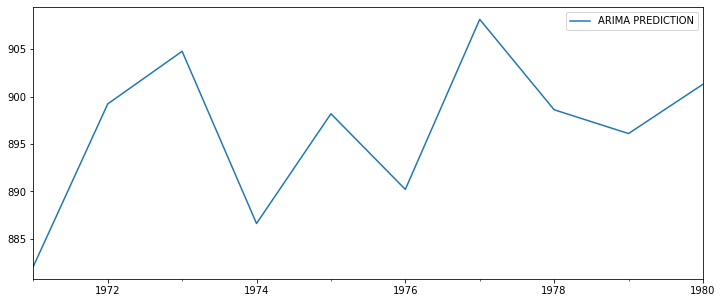

In [36]:
# Feature_prediction.plot(legend=True, figsize=(12,5))
Feature_prediction.plot(legend=True, figsize=(12,5))